In [1]:
from stardist.models import StarDist2D
from csbdeep.utils import Path, normalize
from glob import glob
from tifffile import imread
import scipy.io as sio
from PIL import Image

In [2]:
model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [3]:
index = 0 
images = 'sample.tif'
X = sorted(glob(images))
print('Analyzing ' + X[index])
X = list(map(imread,X))
axis_norm = (0,1) 
model = StarDist2D.from_pretrained('2D_versatile_he')
img = normalize(X[index], 1,99.8, axis=axis_norm)

Analyzing sample.tif
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [4]:
labels, details = model.predict_instances(img, prob_thresh=0.2, nms_thresh=0.5)

In [5]:
im = Image.fromarray(labels)
im.save('mask.tif')

In [6]:
sio.savemat('labels.mat', {'labels':labels})
sio.savemat('details.mat', {'details':details})

In [ ]:
import StarDistPrediction
index = 0 
images = 'sample.tif'
StarDistPrediction.prediction(images, index)

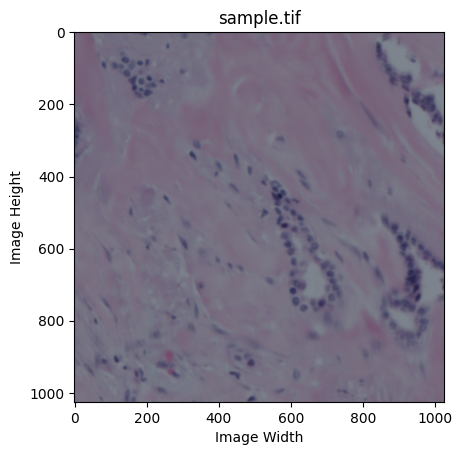

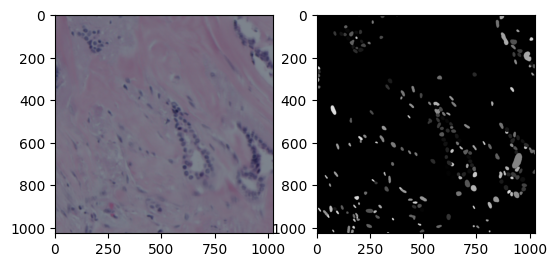

In [15]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
plt.title('sample.tif')
plt.xlabel("Image Width")
plt.ylabel("Image Height")
I1 = mpimg.imread("sample.tif")
I2 = mpimg.imread("mask.tif")
plt.imshow(I1)

fig, axs = plt.subplots(1,2,figsize=(6,6))
axs[0].imshow(I1)
axs[1].imshow(I2)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)